In [1]:
import plotly.io as pio
pio.renderers


Renderers configuration
-----------------------
    Default renderer: 'plotly_mimetype'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery', 'sphinx_gallery_png']

In [2]:
import pandas as pd

df = pd.DataFrame({'A': [1,2,3]})

print(hasattr(df, 'iplot'))


False


In [3]:
import cufflinks as cf
print(hasattr(df, 'iplot'))


True


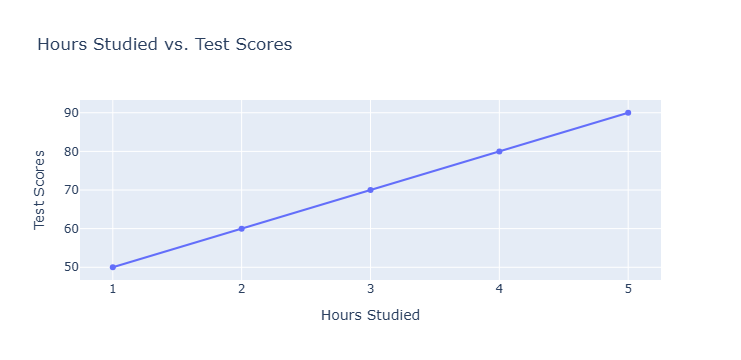

In [4]:
import plotly.express as px
import pandas as pd

data = pd.DataFrame({
    'Hours': [1, 2, 3, 4, 5],
    'Scores': [50, 60, 70, 80, 90]
})

# Interactive scatter plot
fig = px.scatter(data, x='Hours', y='Scores', title='Hours Studied vs. Test Scores', labels={'Hours': 'Hours Studied', 'Scores': 'Test Scores'})

# Add markers + connecting line to visualize trend clearly
fig.update_traces(mode='markers+lines')

# Show interactive plot
fig.show()



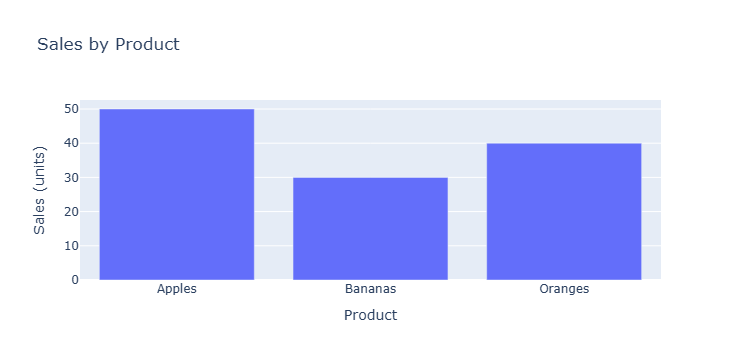

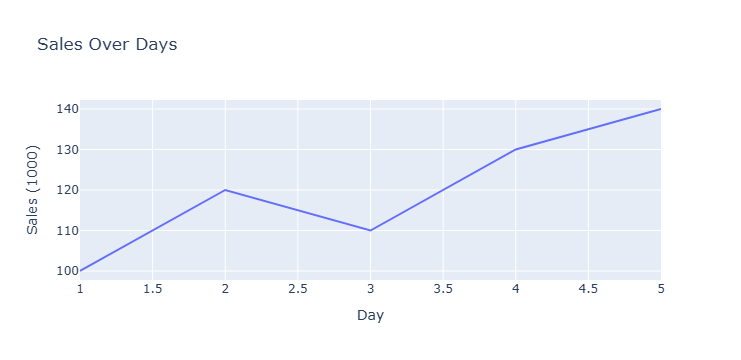

In [6]:
# Data: Sales over days
data = pd.DataFrame({
    'Day': [1, 2, 3, 4, 5],
    'Sales': [100, 120, 110, 130, 140]
})

# Interactive line plot
fig = px.line(data, x="Day", y="Sales", title="Sales Over Days", labels={"Day": "Day", "Sales": "Sales (1000)"})

fig.show()


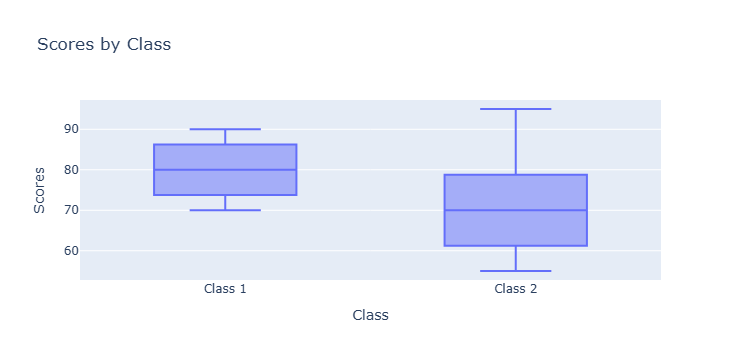

In [7]:
data = pd.DataFrame({
    'Class': ['Class 1']*5 + ['Class 2']*7,
    'Score': [70, 75, 80, 85, 90, 60, 65, 70, 75, 80, 55, 95]
})

# Interactive box plot
fig = px.box(data, x="Class", y="Score", title="Scores by Class", labels={"Class": "Class", "Score": "Scores"})

fig.show()


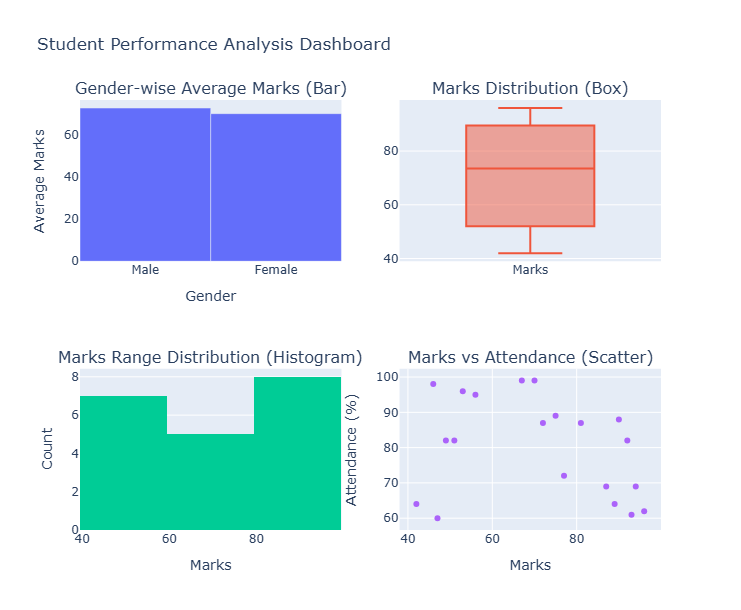

In [8]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import random

# Generate small student dataset (20 students)
students = [
    {
        'gender': random.choice(['Male', 'Female']),
        'marks': random.randint(40, 100),
        'attendance': random.randint(60, 100)
    }
    for _ in range(20)
]

# Organize data
genders = [s['gender'] for s in students]
marks = [s['marks'] for s in students]
attendance = [s['attendance'] for s in students]

# Create subplots
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=(
        'Gender-wise Average Marks (Bar)',
        'Marks Distribution (Box)',
        'Marks Range Distribution (Histogram)',
        'Marks vs Attendance (Scatter)'
    )
)

# 1. Bar Chart - Gender-wise average marks
male_avg = sum(s['marks'] for s in students if s['gender'] == 'Male') / len([s for s in students if s['gender'] == 'Male'])
female_avg = sum(s['marks'] for s in students if s['gender'] == 'Female') / len([s for s in students if s['gender'] == 'Female'])

fig.add_trace(
    go.Bar(x=['Male', 'Female'], y=[male_avg, female_avg]),
    row=1, col=1
)

# 2. Box Plot - Marks distribution
fig.add_trace(
    go.Box(y=marks, name='Marks'),
    row=1, col=2
)

# 3. Histogram - Marks range distribution
fig.add_trace(
    go.Histogram(x=marks, nbinsx=5),
    row=2, col=1
)

# 4. Scatter Plot - Marks vs Attendance
fig.add_trace(
    go.Scatter(x=marks, y=attendance, mode='markers'),
    row=2, col=2
)

# Update layout
fig.update_layout(
    height=600,
    width=800,
    title_text="Student Performance Analysis Dashboard",
    showlegend=False
)

# Update axis labels
fig.update_xaxes(title_text="Gender", row=1, col=1)
fig.update_yaxes(title_text="Average Marks", row=1, col=1)
fig.update_xaxes(title_text="Marks", row=2, col=1)
fig.update_yaxes(title_text="Count", row=2, col=1)
fig.update_xaxes(title_text="Marks", row=2, col=2)
fig.update_yaxes(title_text="Attendance (%)", row=2, col=2)

fig.show()

